In [1]:
import matplotlib.pyplot as plt
import numpy as np

from structured_random_features.src.models.weights import V1_weights

# Package for importing image representation
from PIL import Image, ImageOps

# My code
from src.V1_reconst import generate_Y, reconstruct
from src.filter_reconst import filter_reconstruction

import seaborn as sns
import time
import os.path

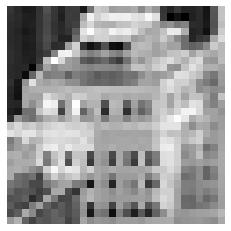

In [20]:
image_nm = 'city_part3.png'
img = Image.open('image/' + image_nm)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.imshow(img, 'gray')
plt.axis('off')
dim = img_arr.shape

(30, 30)


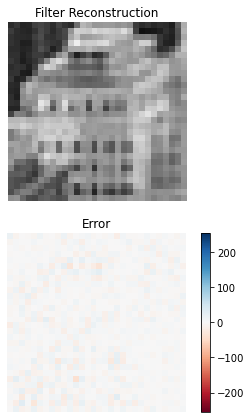

In [57]:
num_cell = 500
cell_sz = 7
sparse_freq = 1
alpha = 1


fig, axs = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout()
reconst = filter_reconstruction(num_cell, img_arr, cell_size = cell_sz, sparse_freq = sparse_freq
                                 , filter_dim=(15, 15), alpha = alpha)

fig.subplots_adjust(left=0.27, bottom=None, right=None, top=None, wspace=None, hspace=None)
axs[0].imshow(reconst, 'gray', vmin=0, vmax=255)
axs[0].axis('off')
axs[0].set_title("Filter Reconstruction")
cax = axs[1].imshow(img_arr - reconst, 'RdBu', vmin = -255, vmax = 255)
axs[1].axis('off')
axs[1].set_title("Error")
fig.colorbar(cax)
fig.savefig("result/filter_reconstruction/city_part3/filter_30X30.png", dpi = 300)